# Machine Learning

#### General Machine Learning Steps

1. Import the data
2. Clean the data
3. Split the data into training/test sets
4. Crete a model
5. Train the model
6. Make predictions
7. Evaluate and improve predictions

### Step 1: Import The Data

In [58]:
import pandas as pd
import matplotlib as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import joblib

import warnings
warnings.filterwarnings('ignore')


In [59]:
df = pd.read_csv('music.csv', encoding='ISO-8859-1')

### Step 1.1: Understand The Data

In [60]:
print(df.shape[0])
print(df.shape[1])

18
3


In [61]:
df.duplicated().sum()

np.int64(0)

In [62]:
df.isnull().sum()

age       0
gender    0
genre     0
dtype: int64

In [63]:
df.dtypes

age        int64
gender     int64
genre     object
dtype: object

In [64]:
df.describe()

,age,gender
count,18.000000,18.000000
mean,27.944444,0.500000
std,5.127460,0.514496
min,20.000000,0.000000
25%,25.000000,0.000000
50%,28.000000,0.500000
75%,31.000000,1.000000
max,37.000000,1.000000


<Axes: >

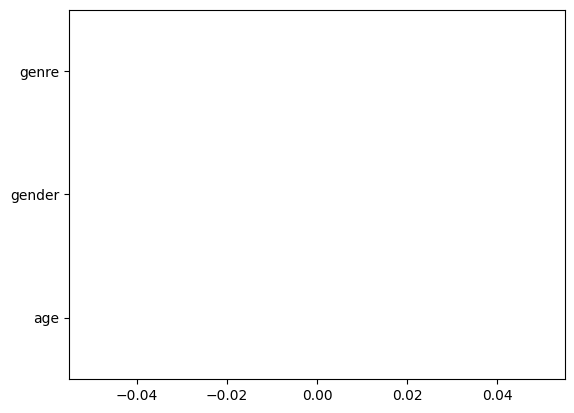

In [65]:
missingData = df.isnull().sum().sort_values(ascending=False)

missingData.plot(kind='barh')

In [66]:
for column in df.columns:
    print(f"{column} : {len(df[column].unique())}")

age : 13
gender : 2
genre : 5


### Step 2 Clean The Data And Split The Data Into Training/Test Sets

In [67]:
m = df[['age', 'gender']]
n = df['genre']

### Step 3: Create A Model

In [68]:
model = DecisionTreeClassifier()
model.fit(m, n)

DecisionTreeClassifier()

In [69]:
predictions = model.predict([ [21,1], [22,0] ])

predictions

array(['HipHop', 'Dance'], dtype=object)

### Step 4: Calculate The Accuracy Of Model

In [70]:
mTrain, mTest, nTrain, nTest = train_test_split(m, n, test_size= 0.2)

model.fit(mTrain, nTrain)
predictions = model.predict( mTest )

In [71]:
score = accuracy_score(nTest, predictions)
score

0.25

### Step 5: Model Persisting

In [72]:
m = df[['age', 'gender']]
n = df['genre']

model = DecisionTreeClassifier()
model.fit(m, n)

### we saved the model here
joblib.dump(model, 'musicRecommender.joblib')

['musicRecommender.joblib']

In [73]:
### we used the model here
joblib.load('musicRecommender.joblib')

DecisionTreeClassifier()

In [74]:
model = joblib.load('musicRecommender.joblib')
predictions = model.predict([ [21,1], [22,0] ])

predictions

array(['HipHop', 'Dance'], dtype=object)

### Step 6: Decision Tree

In [76]:
tree.export_graphviz(model, out_file= 'musicRecommender.dot', feature_names= ['age', 'gender'], class_names= sorted(n.unique()), label = 'all', rounded= True, filled= True)